<a href="https://colab.research.google.com/github/julianrvp/Coderhouse_DS_Reyes/blob/main/Proyecto_final_Juli%C3%A1n_Reyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega final**
## Julián Reyes Varela
### Data Science I: Fundamentos para la Ciencia de Datos. CODERHOUSE.

Mayo de 2024

## 1) Abstract

Como trabajo final del curso *Data Science 1: Fundamentos para la Ciencia de Datos* se abordará el dataset Titanic, buscando predecir la supervivencia o no de los pasajeros a partir de un conjunto de variables explicativas.

Como es ampliamente conocido, el Titanic fue un transatlántico británico que se hundió en su viaje inaugural en 1912 al chocar con un iceberg, provocando una de las mayores tragedias marítimas de la historia, con más de 1,500 personas fallecidas.

## 2) Preparación del cuaderno y del dataset

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


Debido a dificultades con un dataset explorado anteriormente, para esta oportunidad se selecciconó el dataset "Titanic", incluido en la librería Seaborn de Python.

Se trata de una colección de datos que contiene información sobre los pasajeros del transatlántico, incluyendo detalles como la edad, el sexo, la clase de pasaje y si sobrevivieron o no al naufragio. Es utilizado ampliamente en análisis de datos y aprendizaje automático para realizar predicciones basadas en diferentes variables.

In [48]:
df=sns.load_dataset("titanic")

El deataset contiene 15 columnas o variables, y 891 filas.

"survived" y "alive" indican si el pasajero sobrevivió o no;

"class" y "pclass" refieren a la clase (primera, segunda o tercera) del viaje;

"fare" consiste en el costo del pasaje;

"sex" y "age" dicen el sexo y la edad del pasajero;

"who" indica si se trata de hombre, mujer o niño, y "adult_male" indica si se trata o no de un hombre adulto

"embarked" y "embark_town" refieren al lugar de embarque del transatlántico
"alone" da cuenta de si el pasajero viajaba solo o no;

"sibsp" indica el número de hermanos y/o cónyuges que el pasajero tenía a bordo, y "parch" indica el número de padres e hijos que el pasajero tenía a bordo;

"deck", por último, refiere a la ubicación del pasajero en el barco.





In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


A continuación, se analiza la cantidad de NA en la base.

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Para que la ausencia de estos datos no dificulte el análisis, reemplazamos las edades por la mediana, eliminamos la variable "deck" y eliminamos de la base los dos casos sin valores para "embark_town" ni "embarked".

In [7]:
mediana_age = df['age'].median()
df['age'].fillna(mediana_age, inplace=True)

df.dropna(subset=['embark_town', 'embarked'], inplace=True)

df.drop('deck', axis=1, inplace=True)

In [8]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

La base quedó en condiciones para realizar el análisis exploratorio.

## 3) Análisis exploratorio

Para dar comienzo al análisis exploratorio de los datos de Titanic, visualizo sus principales variables para analizar su comportamiento.

Partiendo del supuesto de que los niños y las mujeres tuvieron preferencia en la adjudicación de los botes, luego del naufragio, exploramos el comportamiento de las variables "age", "sex" y "alive", y las relaciones entre ellas.

Descripción de 'alive': count     889
unique      2
top        no
freq      549
Name: alive, dtype: object 



<Axes: xlabel='alive', ylabel='Count'>

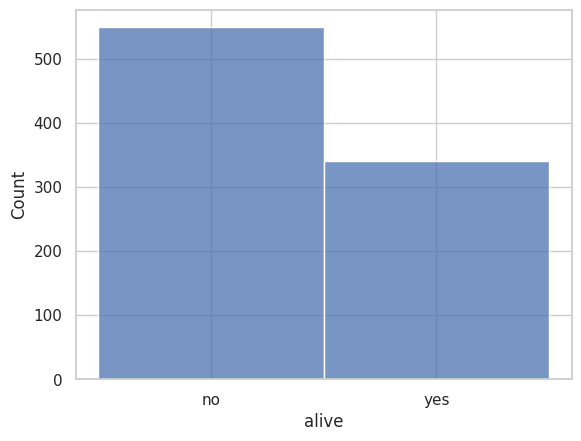

In [41]:
print("Descripción de 'alive':", df["alive"].describe(), "\n")

sns.histplot(data=df, x="alive")

La variable "alive", que es la que queremos explicar, es dicotómica. La mayoría de los tripulantes no sobrevivieron (549 de 889), mientras que sí lo hicieron 340 personas.

La edad ("age"), una de las variables que consideramos pertinente como predictora de la supervivencia, tiene a 29,3 años como media. Considerando que su mediana es de 28, podemos decir que tiene un comportamiento similar al de una distribución normal, si bien con frecuencias más concentradas hacia bajo y menos concentrada en los valores superiores, que llegan a los 80 años de edad en el valor máximo.

Descripción de 'age': count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64 



<Axes: xlabel='age', ylabel='Count'>

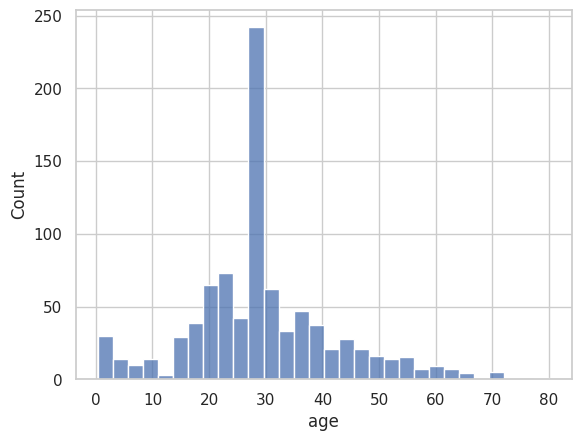

In [42]:
print("Descripción de 'age':", df["age"].describe(), "\n")
sns.histplot(data=df, x="age")

Por otro lado, la mayoría de pasajeros son varones, como puede visualizarse en el siguiente histograma.

Descripción de 'sex': count      889
unique       2
top       male
freq       577
Name: sex, dtype: object 



<Axes: xlabel='sex', ylabel='Count'>

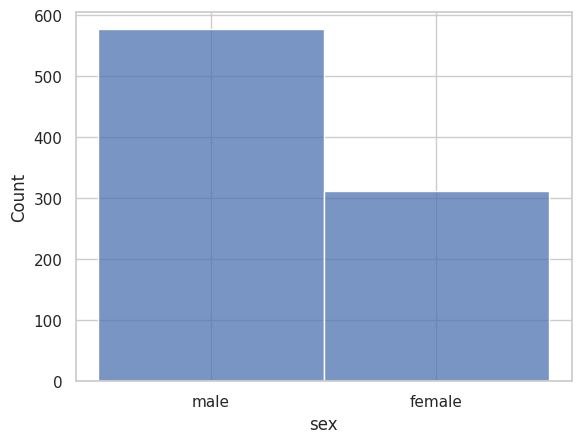

In [43]:
print("Descripción de 'sex':", df["sex"].describe(), "\n")
sns.histplot(data=df, x="sex")

Para continuar la exploración, visualizamos la relación de cada variable explicativa con la variable "alive".

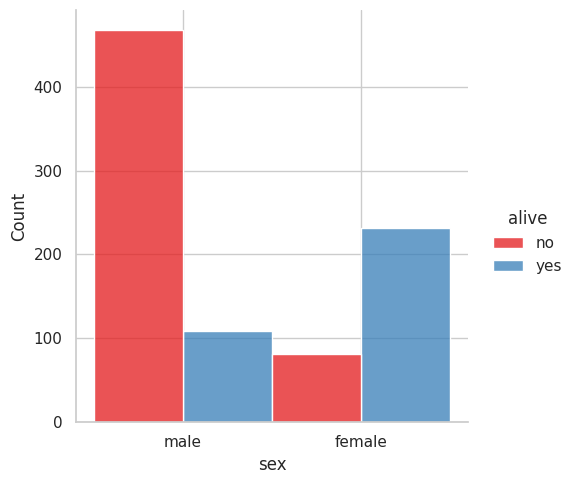

In [44]:
sns.set(style="whitegrid")
sns.displot(data=df, x="sex", hue="alive", multiple = "dodge",palette = "Set1")

La relación entre "sex" y "alive" parece confirmarse al aseverar que, incluso siendo menos mujeres que hombres en el transatlántico, estas son mayoría entre quienes sobrevivieron.

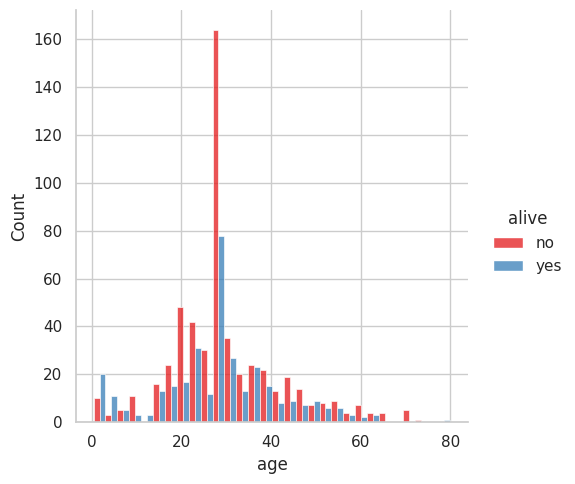

In [45]:
sns.set(style="whitegrid")
sns.displot(data=df, x="age", hue="alive", multiple="dodge",palette = "Set1")

Algo similar sucede con la edad; son en las edades de los adultos jóvenes en las que parecen mayores las distancias entre quienes sobrevivieron y quienes no lo hicieron, siendo más similares las longitudes de las barras en los extremos. Por otro lado, en el caso de las edades menores, aparece mayor proporción de sobrevivientes que de fallecidos.

Para aseverar esto, hacemos un diagrama de caja con estas mismas variables:

<Axes: xlabel='age'>

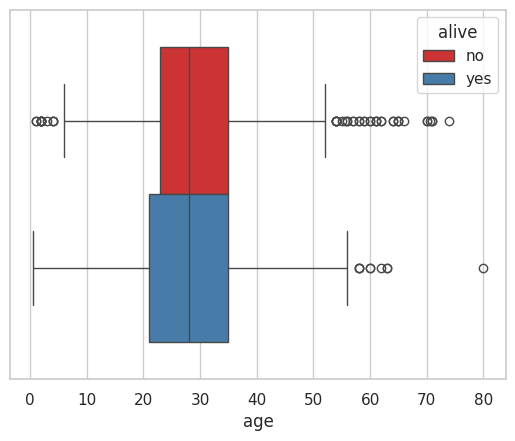

In [46]:
sns.boxplot(data=df, x="age", hue="alive", palette = "Set1")

El diagrama de caja nos confirma una mayor concentración etaria (aunque sutil) en torno a los 30 años, en el caso de quienes no sobrevivieron. Los muy menores y muy mayores suponen outliers en la distribución de los fallecidos, mientras que en el caso de los sobrevivientes solo hay outliers en las edades más elevadas.

Para visualizar el efecto conjunto de ambas variables, se presenta un scatterplot.

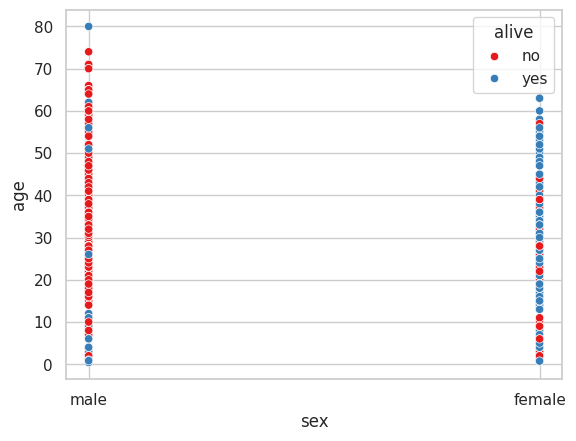

In [47]:
sns.scatterplot(data=df, x='sex', y='age', hue='alive',palette = "Set1")
plt.show()

La visualización va en linea con hipótesis anteriores. Los puntos de los varones son predominantemente rojos y los de las mujeres predominantemente azules.

Es de notar que la distribuciones parecen menos homogeneas en las menores edades: en el caso de los varones aparecen varios puntos azules, aunque también sucede con lo inverso con los puntos rojos en el caso de las mujeres.

También puede verse con claridad la ausencia de puntos azules, para los varones, entre las edades de 30 y 50 años.

## 4) Feature selection

Para profundizar el análisis, recurrimos a técnicas de análisis estadístico más sofisticadas que las del análisis visual. En esta instancia, haremos una prueba de Random Forest, una técnica de feature selection para reconocer los componentes más importantes en la variación de nuestra variable de interés.

Para ello, necesitamos en primer lugar modificar la base, en dos sentidos: no dejar variables muy relacionandas entre sí, y pasar a variables dicotómicas las que son categóricas.

In [9]:
print(df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object


A partir de la lista inicial de variables, y considerando las relaciones encontradas en el DEA, se define eliminar las siguientes en un nuevo dataset (df2):
- "who" y "adult_male", ya que combinan edad y sexo y por lo tanto están fuertemente correlacionadas con ellas.
- "alive", que se traduce numéricamente en "survived"
- "embarked", porque es redundante respecto a "embark town".
- "class" y "pclass", ya que correlacionan con "fare".

In [15]:
df2 = df.drop(['who', "adult_male",'alive',"embarked", "class", "pclass"], axis=1)

In [11]:
print(df2.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
class          category
embark_town      object
alone              bool
dtype: object


Continuando, ahora recodificamos las variables categóricas utilizando one-hot encoding: sex, y embark_town.

In [17]:
df2 = pd.get_dummies(df2, columns=['sex',"embark_town"])

In [18]:
print(df2.dtypes)

survived                     int64
age                        float64
sibsp                        int64
parch                        int64
fare                       float64
alone                         bool
sex_female                    bool
sex_male                      bool
embark_town_Cherbourg         bool
embark_town_Queenstown        bool
embark_town_Southampton       bool
dtype: object


Modificada la base, importamos y corremos los códigos de scikit-learn para conocer las características más importantes del dataset.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df2.drop(['survived'], axis=1)
y = df2['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

importances = rfmodel.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                   Feature  Importance
3                     fare    0.310453
0                      age    0.250370
6                 sex_male    0.142774
5               sex_female    0.136614
1                    sibsp    0.063234
2                    parch    0.045878
7    embark_town_Cherbourg    0.014955
4                    alone    0.014099
9  embark_town_Southampton    0.013856
8   embark_town_Queenstown    0.007767


Los resultados nos confirman la importancia sustantiva del sexo y la edad en la sobrevivencia de los pasajaeros, pero aportan otro elemento que no habíamos considerado hasta ahora: la variable "fare", que refleja el costo de los boletos, es la de mayor importancia para la predicción de "survive".

Para comprender esta relación, hacemos un gráfico de caja:

<Axes: xlabel='alive', ylabel='fare'>

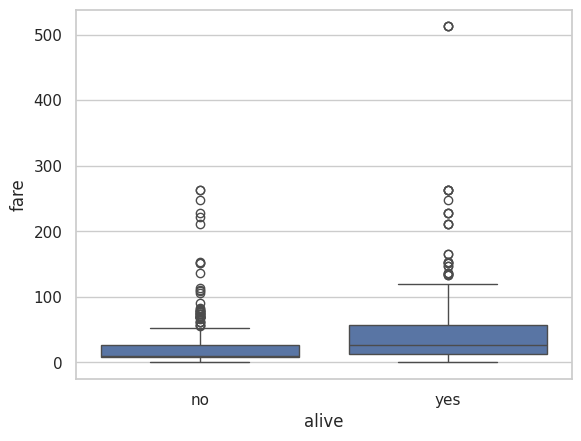

In [40]:
sns.boxplot(x='alive', y='fare', data=df)

El gráfico da cuenta de las mayores tarifas de quienes sobrevivieron al naufragio.

## 5) Regresión logística


Finalmente, probamos un modelo de regresión logística que nos premita predeccir con cierto nivel de certidumbre la probabilidad de haber sobrevivido o no al naufragio del Titanic.

En base a la prueba anterior, y en pos de la parsimonia del modelo, nos quedamos con 3 variables principales: fare, age y sex (sex_male y sex_female).

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
df3 = df2[['survived', 'age', 'sex_male', 'sex_female', 'fare']]

In [25]:
X = df3[['fare', 'age', "sex_male","sex_female"]]
y = df3['survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [34]:
print(model.coef_)
print(model.intercept_)

[[ 0.01136675 -0.01081027 -1.17248403  1.17237903]]
[-0.22596431]


In [35]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8033707865168539


El modelo escogido, a partir de las variables utilizadas, logró un 80% de precisión. Es decir, predijo en el 80% de los casos la supervivencia o no de los pasajeros, a partir de las 3 variables seleccionadas.

Para visualizar el desempeño del modelo, haremos una matriz de confusión.

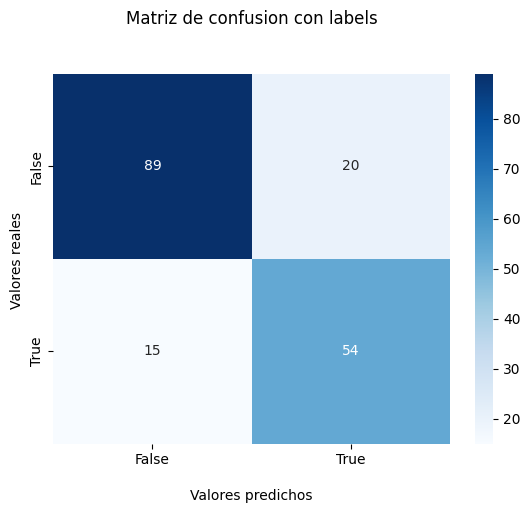

In [37]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



En la matriz podemos visualizar que la mayoría de los casos fueron "verdaderos negativos"; es decir, el modelo predijo 89 veces que no habría supervivencia y efectivamente no la hubo. En segundo lugar, hubo 54 casos de supervivencia predichos por el modelo.

Fuerno minotirarios los errores del modelo, en el que tuvieron una leve preponderancia los falsos positivos por sobre los falsos negativos. Se trata de un modelo más confliable cuando prevee el fallecimiento de los pasajeros (89 contra 15 probabilidades de acierto) que la supervivencica (54 contra 20 probabilidades de acierto).

## 6) Síntesis

En el presente trabajo, basado en el dataset Titanic, se buscó llegar a un modelo sintético que permitiera establecer la probabilidad de haber sobrevivido al naufragio del Titanic en base a un amplio conjunto de variables incluidas en el dataset.

A lo largo del informe, se preparó el dataset para que fuera utilizado, se exploraron diferentes variables y sus relaciones mediante visualiaciones gráficas, se consideraron las variables más importantes en la predicción del target a través de un modelo de feature selection para, finalmente, establecer un modelo de regresión logística con una cantidad parsimoniosa de variables.

El modelo alcanzado considera las variables sex, age y fare para predecir, con un 80% de precisión, la probabilidad de haber sobrevivido o no al naugrafio del Titanic. Esto da cuenta de la importancia que tuvieron el nivel socioeconómico, la edad y el sexo en las posibilidades de naufragio. Es decir: tuvieron mayores probabilidades de sobrevivir los hombres que las mujeres, los niños que los adultos, y quienes tenían tarifas más elevadas que quienes tenían tarifas más bajas.

La matriz de confusión nos confirma la precisión del modelo, así como indica que son más las probabilidades de acierto del modelo cuando predice el fallecimiento que cuando predice la supervivencia.